# Perkenalan

Livecode 2 Phase 1  
Muhammad Bintang Ramadhan  
Data Science Batch 08

### Description Feature Value

#### 

-   Education
1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

-   EnvironmentSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

-   JobInvolvement
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

-   JobSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

-   PerformanceRating
1. 'Low'
2. 'Good'
3. 'Excellent'
4. 'Outstanding'

-   RelationshipSatisfaction
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High'

-   WorkLifeBalance
1. 'Bad'
2. 'Good'
3. 'Better'
4. 'Best'

-   Problems
    1.   Buatlah model machine learning untuk mengklasifikasikan kemungkinan attrition karyawan. Bandingkan antara model Decision Tree dan Random Forest. Analisa dua buah model in dan tentukan model yang terbaik untuk data ini ! Dataset URL

    2.   Berapa % Attrition pada dataset tersebut?

    3.  Umur berapa yang memiliki attration tertinggi?

    4.  Apakah performance dan job satisfaction mempengaruhi attrition?

    5.  Apakah yang memeliki income yang rendah, lebih cenderung Attrition?

    6.  Apakah work life balance mempengaruhi tingkat attrition?

# Import Pustaka

In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Evaluasi Model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Import Data

In [2]:
# Load data menggunakan pandas
pd.set_option('display.max_columns', 50) #Untuk memunculkan seluruh column
df_ori = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv') #Load data WA_Fn-UseC_-HR-Employee-Attrition.csv' 
df = df_ori.copy() #menduplikasi data original
df.head() #memunculkan 5 data teratas

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

-   Terdapat 1470 data dalam 35 Kolom
-   Tipe data integer 26 kolom dan object 9 kolom

In [4]:
#Mengecek Jumlah dan berapa persen Missing Value di Fitur 'Price' 
mis = df.isnull().sum() #Jumlah Missing Value
misperc = df.isnull().sum() /len(df) *100 #Berapa persen Missing Value
misval = pd.DataFrame({'Missing Value' :mis,'Missing Value %': round(misperc)}) #Julah Missing Value dan Berapa persen Missing Value kedalam sebuah DataFrame
misval[misval['Missing Value'] > 0] #Hanya menampilkan yang memiliki Missing Value 

,Missing Value,Missing Value %


-   Dataset ini tidak memiliki Missing Value

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


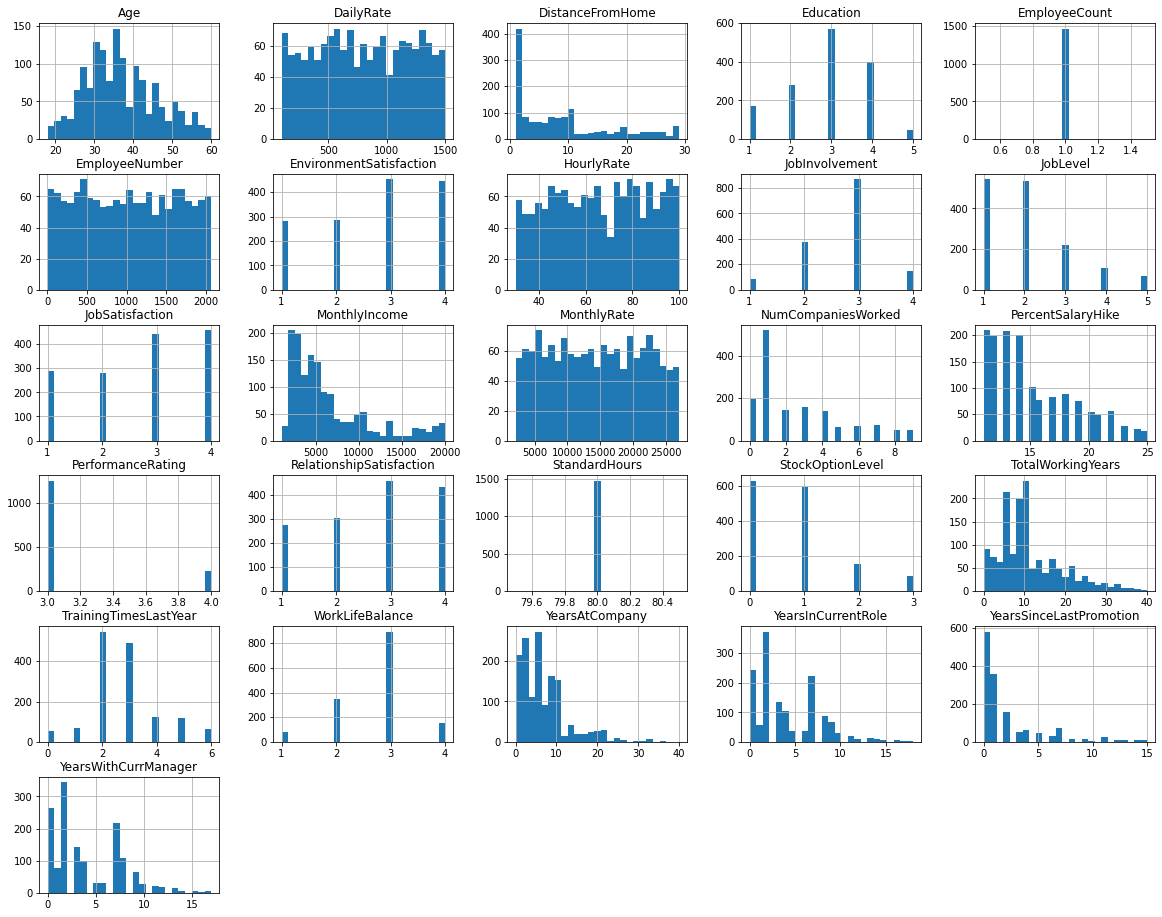

In [7]:
#Mengecek distribusi data
df.hist(bins=25, figsize=(20,16))
plt.show()

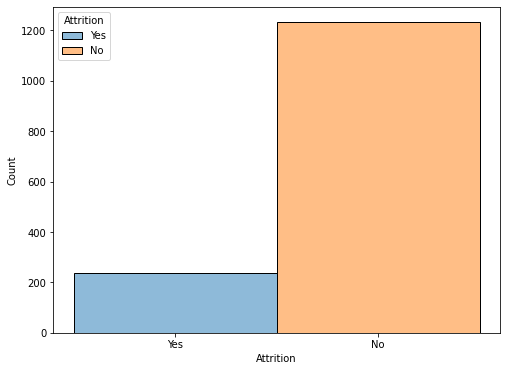

In [8]:
#plotting fitur target
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="Attrition", hue="Attrition")
plt.show()

## Visualisasi 
Menjawab problems no 2-6

In [9]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


2. Berapa % Attrition pada dataset tersebut?

3. Umur berapa yang memiliki attration tertinggi?

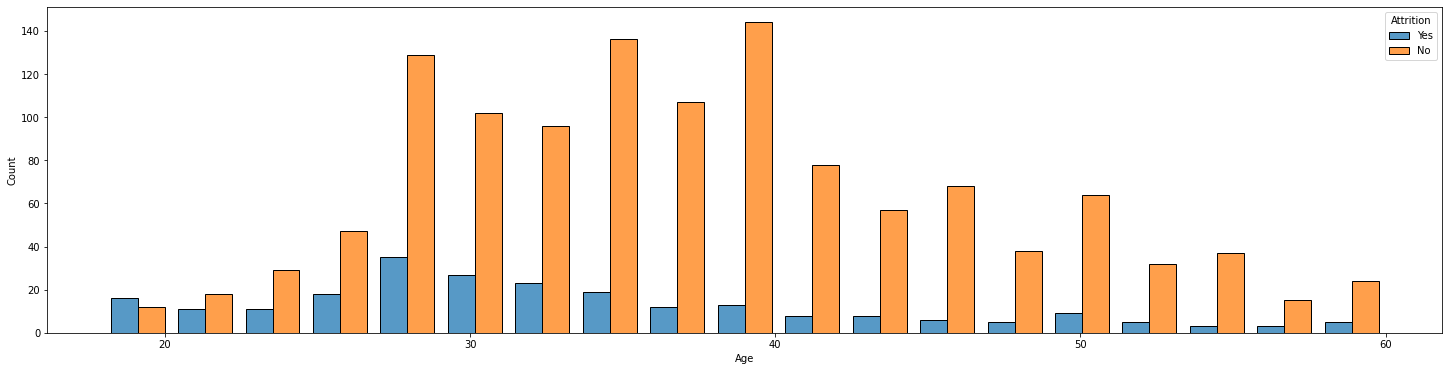

In [10]:
plt.figure(figsize=(25,6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='dodge', shrink=.8)
plt.show()

-   Umur 28 memiliki Attrition tertinggi

4. Apakah performance dan job satisfaction mempengaruhi attration?

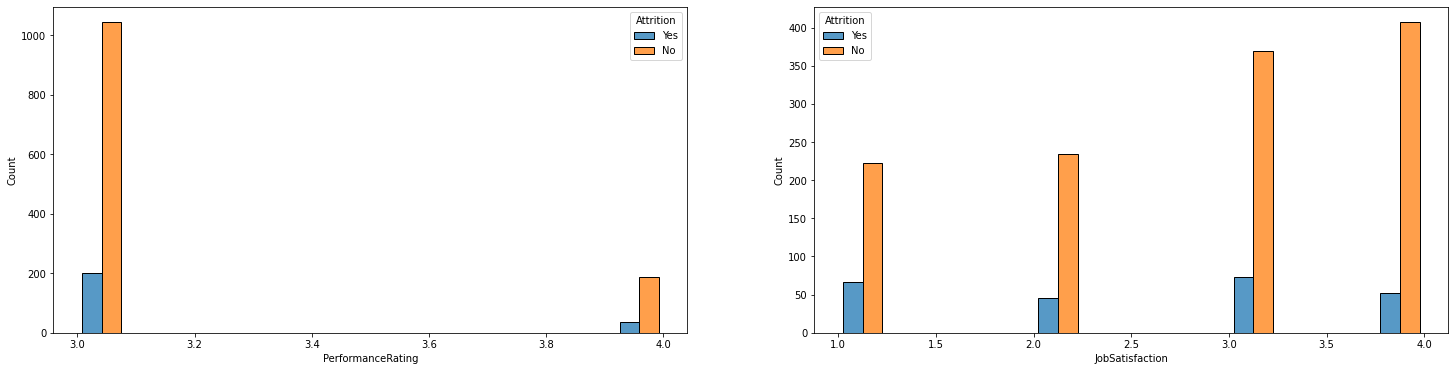

In [11]:
plt.figure(figsize=(25,6))

plt.subplot(1,2,1)
sns.histplot(data=df, x='PerformanceRating', hue='Attrition', multiple='dodge', shrink=.8)

plt.subplot(1,2,2)
sns.histplot(data=df, x='JobSatisfaction', hue='Attrition', multiple='dodge', shrink=.8)

plt.show()

-   Performance rendah berpengaruh terhadap attrition
-   JobSatisfaction tidak berpengaruh terhadap attrition

5. Apakah yang memiliki income yang rendah, lebih cenderun attrition?

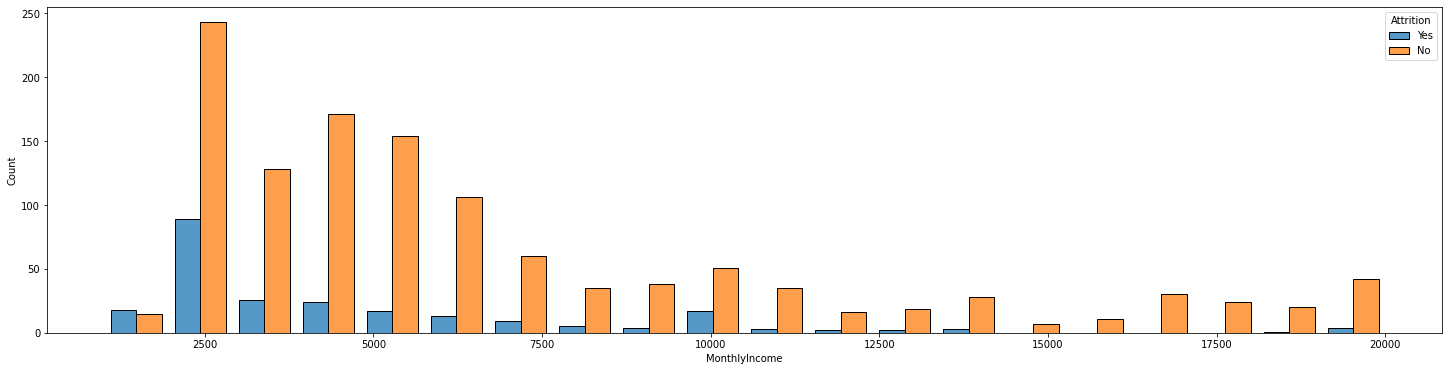

In [12]:
plt.figure(figsize=(25,6))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', multiple='dodge', shrink=.8)
plt.show()

-   Memiliki Monthly Income rendah cenderung attrition

6. Apakah work life balance mempengaruhi tingkat attrition?

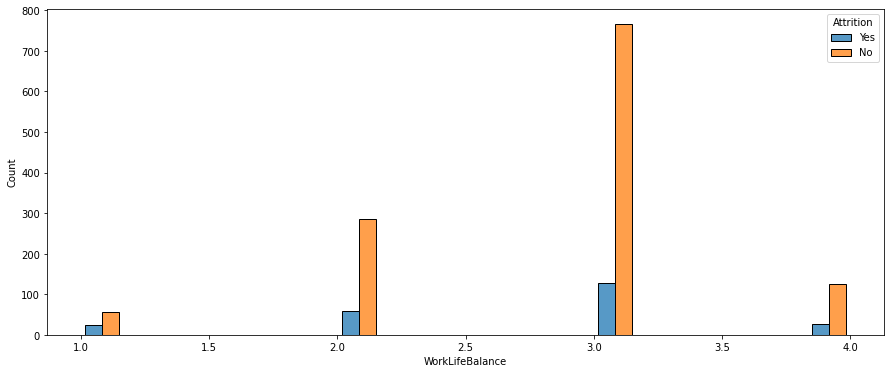

In [13]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='WorkLifeBalance', hue='Attrition', multiple='dodge', shrink=.8)
plt.show()

-   Saya rasa tidak ada penharuh work life balance terhadap attrition

# Data Preprocessing

- Get Data Inference
-   Feature Selection
-   Scaling Features
-   Encoding Feature
-   Tidak melakukan handling Missing Value karena tidak ada missing value, tidak melakukan handling Outliers karena model tidak sensitif terhadap Outliers

## Get Data Inference

In [14]:
#Mengambil sepuluh data dari dataset untuk dijadikan data inference
inf = df.sample(10, random_state=7)
inf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
71,29,No,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,1,94,3,Male,76,3,1,Research Scientist,2,Married,2703,4956,0,Y,No,23,4,4,80,1,6,3,3,5,4,0,4
259,31,Yes,Travel_Frequently,307,Research & Development,29,2,Medical,1,355,3,Male,71,2,1,Laboratory Technician,2,Single,3479,11652,0,Y,No,11,3,2,80,0,6,2,4,5,4,1,4
363,33,Yes,Travel_Rarely,350,Sales,5,3,Marketing,1,485,4,Female,34,3,1,Sales Representative,3,Single,2851,9150,1,Y,Yes,13,3,2,80,0,1,2,3,1,0,0,0
185,33,No,Travel_Rarely,931,Research & Development,14,3,Medical,1,252,4,Female,72,3,1,Research Scientist,2,Married,2756,4673,1,Y,No,13,3,4,80,1,8,5,3,8,7,1,6
1015,34,No,Travel_Frequently,560,Research & Development,1,4,Other,1,1431,4,Male,91,3,1,Research Scientist,1,Divorced,2996,20284,5,Y,No,14,3,3,80,2,10,2,3,4,3,1,3
412,46,No,Travel_Rarely,1485,Research & Development,18,3,Medical,1,550,3,Female,87,3,2,Manufacturing Director,3,Divorced,4810,26314,2,Y,No,14,3,3,80,1,19,5,2,10,7,0,8
1369,28,Yes,Travel_Rarely,1475,Sales,13,2,Marketing,1,1933,4,Female,84,3,2,Sales Executive,3,Single,9854,23352,3,Y,Yes,11,3,4,80,0,6,0,3,2,0,2,2
715,33,No,Travel_Frequently,827,Research & Development,1,4,Other,1,998,3,Female,84,4,2,Healthcare Representative,2,Married,5488,20161,1,Y,Yes,13,3,1,80,1,6,2,3,6,5,1,2
454,29,No,Travel_Rarely,232,Research & Development,19,3,Technical Degree,1,611,4,Male,34,3,2,Manufacturing Director,4,Divorced,4262,22645,4,Y,No,12,3,2,80,2,8,2,4,3,2,1,2
101,32,No,Travel_Rarely,827,Research & Development,1,1,Life Sciences,1,134,4,Male,71,3,1,Research Scientist,1,Single,2956,15178,1,Y,No,13,3,4,80,0,1,2,3,1,0,0,0


In [15]:
# Menghapus data Inference dari dalam dataset
df = df.drop(inf.index)
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [16]:
# Reset Index untuk Data dan data for inference
df.reset_index(drop=True, inplace=True)
inf.reset_index(drop=True, inplace=True)

## Feature Selection

In [17]:
#Membuat dataframe untuk meliha korelasi fitur2 numerik terhadap fitur target (Attrition)
df_featselect = df.copy()
df_featselect.Attrition.replace('No', 0, inplace=True)
df_featselect.Attrition.replace('Yes', 1, inplace=True)

Text(0.5, 1.0, 'Heatmap Korelasi')

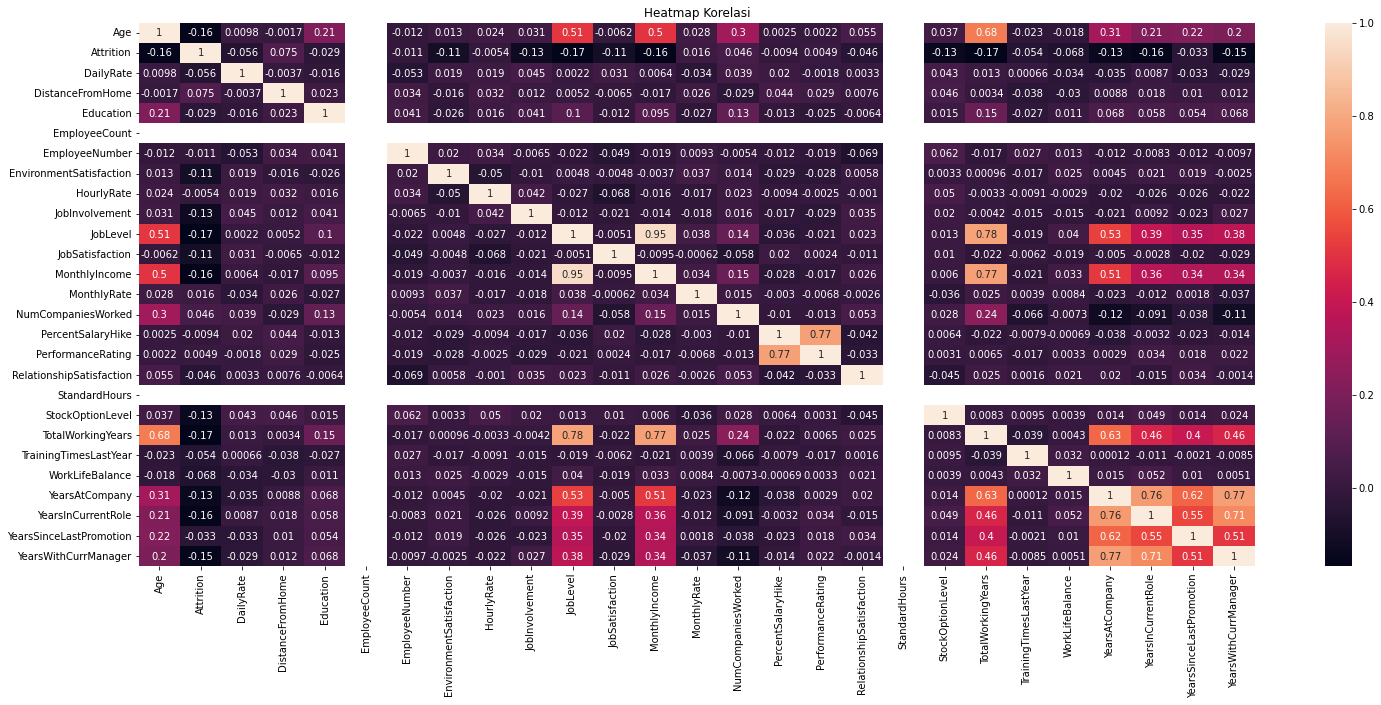

In [18]:
plt.figure(figsize=(25,10)) #Ukuran Plot
sns.heatmap(df_featselect.corr(), annot=True) #Menampilkan korelasi dari df_featselect, yang saya fokuskan korelasi terhadap fitur 'Attrition'
plt.title('Heatmap Korelasi') #Title plot

-   Untuk fitur yang memiliki korelasi 0.1 keatas maka akan dijadikan fitur untuk modelling
-   Seluruh fitur categorical akan dijadikan fitur untuk modelling

In [19]:
df = df[['Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'TotalWorkingYears', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager','OverTime','Over18','MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department', 'BusinessTravel', 'Attrition' ]]
df.head(2)

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,OverTime,Over18,MaritalStatus,JobRole,Gender,EducationField,Department,BusinessTravel,Attrition
0,41,2,3,2,4,5993,8,0,6,4,5,Yes,Y,Single,Sales Executive,Female,Life Sciences,Sales,Travel_Rarely,Yes
1,49,3,2,2,2,5130,10,1,10,7,7,No,Y,Married,Research Scientist,Male,Life Sciences,Research & Development,Travel_Frequently,No


## Train Test Split

In [20]:
X = df.drop(columns='Attrition')
y = df.Attrition

In [21]:
#Melakuka split data, untuk target dilakukan stratify agar pembagian rata antara 1(yes) dan 0(no)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

In [22]:
y_train = y_train.replace({'No' : 0, 'Yes' : 1})
y_test = y_test.replace({'No' : 0, 'Yes' : 1})
#Melihat bentuk dataframe setelah dilakukan split data 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1022, 19)
(1022,)
(438, 19)
(438,)


## Pipeline for scaling and encoding

In [23]:
# Membuat Numerical dan Categorical Columns

num_col = X_train.select_dtypes(include=np.number).columns.tolist() 
cat_col = X_train.select_dtypes(include='object').columns.tolist()

cat_col, num_col

(['OverTime',
  'Over18',
  'MaritalStatus',
  'JobRole',
  'Gender',
  'EducationField',
  'Department',
  'BusinessTravel'],
 ['Age',
  'EnvironmentSatisfaction',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'TotalWorkingYears',
  'StockOptionLevel',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsWithCurrManager'])

In [24]:
# Pipeline untuk tipe data Numeric lalu dilakukan scalling
numeric_prep = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')), #untuk dataset ini tidak memiliki Missing Value, seandainya fresh data yang dimasukan ada Missing Value jadi bisa otomatis terhandling
            ('scaler', MinMaxScaler())]
)

# Pipeline untuk tipe data categorical lalu dilakukan Encoding
Categorical_prep = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')), #untuk dataset ini tidak memiliki Missing Value, seandainya fresh data yang dimasukan ada Missing Value jadi bisa otomatis terhandling
            ('encode', OneHotEncoder())]
)

In [25]:
#Membuat Pipeline Preprocessing gabungan antara pipeline numerical dan categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_prep, num_col ),
        ('cat', Categorical_prep, cat_col)
    ]
)

# Modelling

In [26]:
#Definisi Model

#Model Random Forest
pipe_rf = Pipeline([
    ('prep', preprocessor),
    ('rf', RandomForestClassifier())
])

#Model Decision Tree
pipe_dt = Pipeline([
    ('prep', preprocessor),
    ('dt', DecisionTreeClassifier())
])

# Evaluation Score

In [27]:
MLA = [pipe_rf, pipe_dt]

# Predict & Evaluation score
name = []
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1score = []
test_score = []
for alg in MLA:
    name.append(alg.steps[1][1].__class__.__name__)
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test = alg.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
    precision.append(precision_score(y_test, y_pred_test))
    recall.append(recall_score(y_test, y_pred_test))
    f1score.append(f1_score(y_test, y_pred_test))

compare = pd.DataFrame({'Name': name, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precission Score': precision, 'Recall Score': recall, 'F1 Score': f1score})

In [28]:
compare.sort_values(by = 'Test Accuracy', ascending=False)

,Name,Train Accuracy,Test Accuracy,Precission Score,Recall Score,F1 Score
0,RandomForestClassifier,1.0,0.856164,0.629630,0.242857,0.350515
1,DecisionTreeClassifier,1.0,0.769406,0.261538,0.242857,0.251852


-   Score test accuracy tertinggi adalah Random Forest, tetapi model Overfit maka akan dilakukan optimisasi model
-   Tidak menutup kemungkinan Decision Tree bisa memiliki nilai accuracy lebih tinggi jika dilakukan optimisasi, maka akan dilakukan optimisasi model juga

## Model Improvement

#### Hyperparameter Tuning Random Forest Classifier

In [29]:
param_grid_rf = [
    {
        'rf__n_estimators' : [5,20,50],
        'rf__max_features' : ['auto', 'sqrt'],
        'rf__max_depth' : [3,5,7,12],
        'rf__min_samples_split' : [2,3]
    }
]

In [30]:
clf_rf = GridSearchCV(pipe_rf, param_grid = param_grid_rf, cv = 3, verbose=True, n_jobs=-1)

best_clf_rf = clf_rf.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [31]:
best_clf_rf.best_params_
best_clf_rf.best_score_

0.8629952274164797

In [32]:
best_rf = best_clf_rf.best_estimator_

#### Hyperparameter Tuning Decision Tree Classifier

In [33]:
param_grid_dt = {
    'dt__max_depth': [2, 3, 5, 10],
    'dt__min_samples_leaf': [5,10,20,50,100],
    'dt__criterion': ['gini', 'entropy']
}

In [34]:
clf_dt = GridSearchCV(pipe_dt, param_grid = param_grid_dt, cv = 3, verbose=True, n_jobs=-1)

best_clf_dt = clf_dt.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [35]:
best_clf_dt.best_params_
best_clf_dt.best_score_

0.8561698579725144

In [36]:
best_dt = best_clf_dt.best_estimator_

In [37]:
best_MLA = [best_rf, best_dt]

# Predict & Evaluation score
name = []
train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1score = []
test_score = []
for alg in best_MLA:
    name.append(alg.steps[1][1].__class__.__name__)
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test = alg.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
    precision.append(precision_score(y_test, y_pred_test))
    recall.append(recall_score(y_test, y_pred_test))
    f1score.append(f1_score(y_test, y_pred_test))

compare_best_model = pd.DataFrame({'Name': name, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precission Score': precision, 'Recall Score': recall, 'F1 Score': f1score})

In [38]:
compare_best_model

,Name,Train Accuracy,Test Accuracy,Precission Score,Recall Score,F1 Score
0,RandomForestClassifier,0.918787,0.858447,0.700000,0.2,0.311111
1,DecisionTreeClassifier,0.868885,0.849315,0.583333,0.2,0.297872


Setelah dilakukan Optimasi Model, saya memutuskan untuk menggunakan model DecisionTreeClassifier, karena model goodfit.

# Model Inference

In [42]:
#Inference Model
y_pred_inf = best_dt.predict(inf)
prediction = pd.DataFrame(y_pred_inf, columns=['Prediction'])
result_prediction = pd.concat([inf,prediction],axis=1)
result_prediction

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Prediction
0,29,No,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,1,94,3,Male,76,3,1,Research Scientist,2,Married,2703,4956,0,Y,No,23,4,4,80,1,6,3,3,5,4,0,4,0
1,31,Yes,Travel_Frequently,307,Research & Development,29,2,Medical,1,355,3,Male,71,2,1,Laboratory Technician,2,Single,3479,11652,0,Y,No,11,3,2,80,0,6,2,4,5,4,1,4,0
2,33,Yes,Travel_Rarely,350,Sales,5,3,Marketing,1,485,4,Female,34,3,1,Sales Representative,3,Single,2851,9150,1,Y,Yes,13,3,2,80,0,1,2,3,1,0,0,0,0
3,33,No,Travel_Rarely,931,Research & Development,14,3,Medical,1,252,4,Female,72,3,1,Research Scientist,2,Married,2756,4673,1,Y,No,13,3,4,80,1,8,5,3,8,7,1,6,0
4,34,No,Travel_Frequently,560,Research & Development,1,4,Other,1,1431,4,Male,91,3,1,Research Scientist,1,Divorced,2996,20284,5,Y,No,14,3,3,80,2,10,2,3,4,3,1,3,0
5,46,No,Travel_Rarely,1485,Research & Development,18,3,Medical,1,550,3,Female,87,3,2,Manufacturing Director,3,Divorced,4810,26314,2,Y,No,14,3,3,80,1,19,5,2,10,7,0,8,0
6,28,Yes,Travel_Rarely,1475,Sales,13,2,Marketing,1,1933,4,Female,84,3,2,Sales Executive,3,Single,9854,23352,3,Y,Yes,11,3,4,80,0,6,0,3,2,0,2,2,0
7,33,No,Travel_Frequently,827,Research & Development,1,4,Other,1,998,3,Female,84,4,2,Healthcare Representative,2,Married,5488,20161,1,Y,Yes,13,3,1,80,1,6,2,3,6,5,1,2,0
8,29,No,Travel_Rarely,232,Research & Development,19,3,Technical Degree,1,611,4,Male,34,3,2,Manufacturing Director,4,Divorced,4262,22645,4,Y,No,12,3,2,80,2,8,2,4,3,2,1,2,0
9,32,No,Travel_Rarely,827,Research & Development,1,1,Life Sciences,1,134,4,Male,71,3,1,Research Scientist,1,Single,2956,15178,1,Y,No,13,3,4,80,0,1,2,3,1,0,0,0,0


# Conclussion

-   EDA
    -   Usia sekitar 25-30, Performance Rating 'Excellent', Work Life Balance 'better' dan memiliki Income rendah sangat berpengaruh terhadap attrition karyawan. Menurut saya masuk akal, di usia 25-30 orang-orang masih ingin eksplorasi diri, ditambah ia merasa performance rating excellent tetapi memiliki income yang rendah, maka ia akan mencoba mencari tempat kerja yang lebih bisa menghargai performance ratingnya dengan income yang semakin tinggi.

-   Model
    -   Setelah dilakukan optimasi model, model decisiontree saya pilih dikarenakan model goodfit dan test accuracy beda kecil dari randomforest. Tetapi kedua model ini saya rasa kurang cocok untuk memecahkan kasus dalam dataset ini karena hanya memiliki accuracy 85 dan 85, dapat dilihat juga dalam dataframe inference yang saya buat bahwa tidak ada Attrition 'Yes' yang terprediksi benar.